In [18]:
from __future__ import print_function, division
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from decimal import Decimal as D
from scipy.interpolate import CubicSpline


def logistic(r,K,t):
    ''' This is the standard logistic function, with a fixed carrying capacity'''
    num = np.zeros(t+1)
    num[0] = 1
    for i in range(t):
        num[i+1] = num[i]+r*num[i]*(1-num[i]/K)
    return num


def KLogistic(rK,k1,kMax,t,tMid):
    ''' 
        This is the adjusted logistic function for dynamic carying rate which gives us the sigmoidal
        carrying capacity between k1 and kMax
    '''
    num = np.zeros(t+1)
    num[0] = k1
    rK = round(rK,7)
    tMid = round(tMid,7)
    for i in range(int(t)):
        num[i+1] = k1+(kMax/(1+math.exp(-rK*(i-(t/tMid)))))
    return num

def logisticK(r,numK,t):
    ''' 
        A revised logistic function that will take into account a dynamic carrying capacity
        Of note, it does not care how the numK array is produced, but here we are primarly using
        a mofidied logistic that acts sigmoidally between an intial K carrying capacity and a KMax
    '''
    r = round(r,7)
    num = np.zeros(t+1)
    num[0] = 1
    for i in range(t):
        num[i+1] = num[i]+r*num[i]*(1-num[i]/numK[i])
    return num


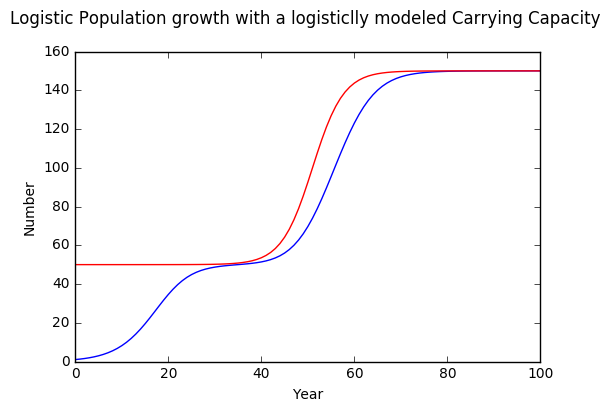

In [19]:
#Define our logistic model parameters for our population
r = .25 # growth rate / yr
K = 100 # carrying capacity
t = 100 # number of years

#Define our parameters for the logisticlly modeled
#dynamic carrying capacity
rK = .30 #adoption/diffusion rate of the technology
k1 = 50 #the initial level of carrying capacity provided
kMax = 100 #the max possible carrying capacity provided by new tech
kLog = KLogistic(rK,k1,kMax,t,2)

plotDataK = logisticK(r,kLog,t)

plt.plot(range(t+1),plotDataK, 'b')
plt.plot(range(t+1),kLog, 'r')
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Logistic Population growth with a logisticlly modeled Carrying Capacity \n')
plt.show()

178
178


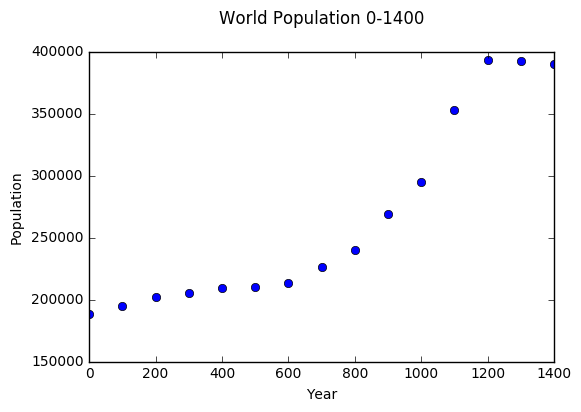

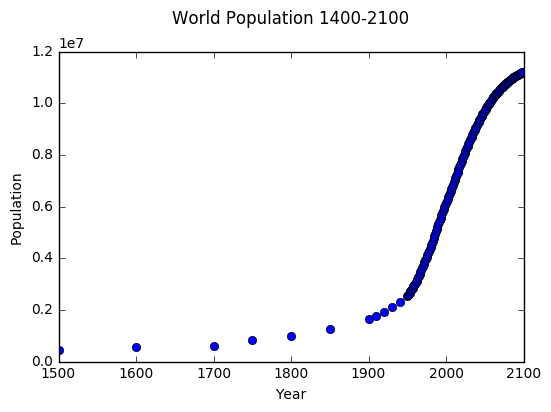

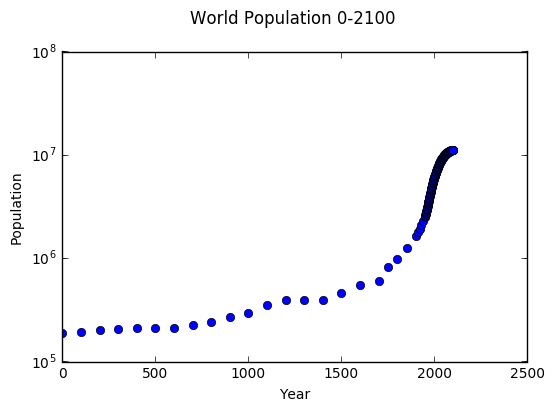

In [20]:
#ok, so we have our base logistic function to work from now,
#we should use some monte carlo to train our parameters on some
#training data. 


earlyHistDates = np.arange(0,1700,100)
earlyPopData = np.array([188,195,202,205,209,210,213,226,240,
                         269,295,353,393,392,390,461,554])

earlyPopData = earlyPopData*1000


midHistDates = np.arange(1700,1900,50)
midPopData = np.array([603,814,989,1263])

midPopData = midPopData*1000


curHistDates = np.arange(1900,1950,10)
curPopData = np.array([1654,1777,1912,2092,2307])

curPopData = curPopData*1000

modHistDates = np.arange(1950,2016,1)

modPopData = np.array([2525149,2571868,2617940,2664029,2710678,2758315,2807246,
                       2857663,2909651,2963216,3018344,3075073,3133554,3194075,
                       3256989,3322495,3390686,3461343,3533967,3607866,3682488,
                       3757735,3833595,3909722,3985734,4061399,4136542,4211322,
                       4286282,4362190,4439632,4518602,4599003,4681211,4765658,
                       4852541,4942056,5033805,5126633,5218978,5309668,5398329,
                       5485115,5570045,5653316,5735123,5815392,5894155,5971883,
                       6049205,6126622,6204311,6282302,6360765,6439842,6519636,
                       6600220,6681607,6763733,6846480,6929725,7013427,7097500,
                       7181715,7265786,7349472
                       ])

midFutureDates = np.arange(2015,2101,1)
midFutureData = np.array([7349472,7432663,7515284,7597176,7678175,7758157,
                          7837029,7914764,7991397,8067008,8141661,8215349,
                          8288055,8359824,8430712,8500766,8570000,8638417,
                          8706032,8772860,8838908,8904177,8968662,9032348,
                          9095213,9157234,9218401,9278694,9338073,9396486,
                          9453892,9510268,9565600,9619870,9673057,9725148,
                          9776138,9826020,9874772,9922372,9968809,10014085,
                          10058223,10101266,10143272,10184290,10224341,10263447,
                          10301668,10339074,10375719,10411635,10446830,10481298,
                          10515022,10547989,10580207,10611689,10642429,10672418,
                          10701653,10730139,10757884,10784884,10811134,10836635,
                          10861387,10885409,10908740,10931432,10953525,10975033,
                          10995954,11016299,11036070,11055270,11073895,11091939,
                          11109392,11126238,11142461,11158037,11172942,11187147,
                          11200617,11213317
                        ])

histData = np.concatenate((earlyPopData,midPopData,curPopData,modPopData,midFutureData))
histRange = np.concatenate((earlyHistDates,midHistDates,curHistDates,modHistDates,midFutureDates))

print(histData.size)
print(histRange.size)

plt.plot(histRange[0:15:1],histData[0:15:1], 'bo')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('World Population 0-1400\n')
plt.show()

plt.plot(histRange[15:histRange.size:1],histData[15:histData.size:1], 'bo')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('World Population 1400-2100\n')
plt.show()

plt.plot(histRange,histData, 'bo')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('World Population 0-2100 \n')
plt.yscale('symlog', linthreshy=0.5)
plt.show()


[ 400  500  600  700  800  900 1000 1100 1200 1300 1400 1500 1600 1700]


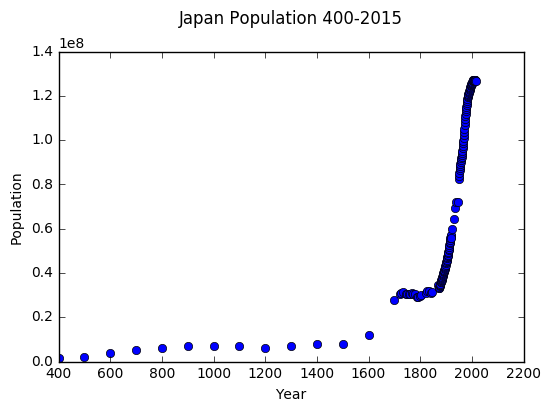

In [21]:
#Ok, so there is some arguement to be made that the world population works for taking as our training data,
#but a better assumption would be to treat the Mars colony as a country rather than the globe. Specifically,
#an isolated, relativley resource scare country that has a high technology adoption and diffusion rate out of
#neccesity. The best candidate here is probably Japan.

earlyJpDate = np.arange(400,1800,100)
print(earlyJpDate)
earlyJpPop = np.array([1500000,2000000,4000000,5000000,6000000,7000000,7000000,7000000,
                       6000000,7000000,8000000,8000000,12000000,28000000]) #braben

mejJpDate = np.array([1721,1726,1732,1744,1750,1756,1762,1768,1774,1780,1786,1792,1798,1804,1822,
                     1828,1834,1840,1846,1870])
mejJpPop = np.array([30496900,31104400,31498500,30599500,30323900,30502700,30328100,
                     30714900,30408800,30432400,29351200,29123000,29801100,29977690,
                     31124500,31825600,31664800,31102100,31481900,34620000 
                     ]) #braben

impJpDate = np.arange(1872,1921,1)
impJpPop = np.array([
                    33110796,33300644,33625646,33997415,34338367,34628328,34898540,35768547,
                    35929023,36358955,36700079,37017262,37451727,37868949,38151217,38507177,
                    39069691,39607234,40072020,40453461,40718677,41089940,41388313,41813215,
                    42270620,42708264,43228863,43763855,44270495,44825597,45446369,46041768,
                    46732876,47219566,47678396,48164761,48819630,49588804,50254471,50984844,
                    51753934,52522753,53362682,54142441,54935755,55637431,56335971,56667711,
                    57233906
            ])

midJpDate = np.arange(1920,1955,5)
midJpPop = np.array([55963,59737,64450,69254,71933,72147,82200])
midJpPop = midJpPop*1000

modHistDates = np.arange(1951,2016,1)
modJPop = np.array([83794,85175,86378,87439,88390,89262,90085,
                    90883,91682,92501,93357,94264,95228,96253,97342,
                    98495,99711,100989,102324,103708,105143,106617,
                    108086,109495,110805,111993,113068,114055,114993,
                    115912,116822,117709,118552,119319,119989,120551,
                    121022,121433,121831,122249,122703,123180,123659,
                    124102,124483,124795,125048,125266,125481,125715,
                    125974,126250,126524,126773,126979,127137,127250,
                    127318,127341,127320,127253,127140,126985,126795,
                    126573
            ])
modJPop = modJPop*1000

jpData = np.concatenate((earlyJpPop,mejJpPop,impJpPop,midJpPop,modJPop))
jpRange = np.concatenate((earlyJpDate,mejJpDate,impJpDate,midJpDate,modHistDates))
plt.plot(jpRange,jpData, 'bo')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Japan Population 400-2015\n')
plt.show()

In [22]:
#Okay, this looks more promising to our initial hypothesis!
#Let's tune our parameters to the two data sets and then we can
#do some extrapolation as to how a Mars Population might grow!

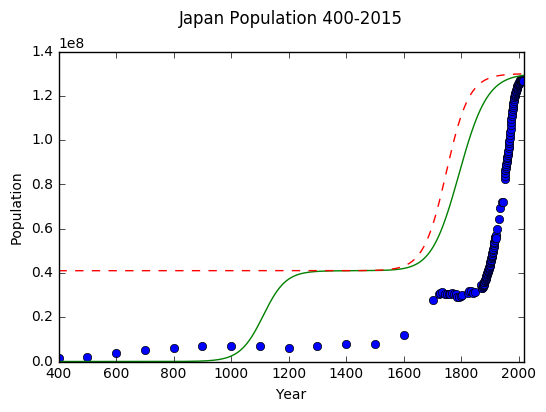

In [23]:
#Define our logistic model parameters for our population
r = .05 # growth rate / yr
t = 815 # number of years

#Define our parameters for the logisticlly modeled
#dynamic carrying capacity
rK = .05 #adoption/diffusion rate of the technology
k1 = 41000000 #the initial level of carrying capacity provided
kMax = 130000000-k1 #the max possible carrying capacity provided by new tech
kLog = KLogistic(rK,k1,kMax,t,1.2)

plotDataK = logisticK(r,kLog,t)

x_values = np.linspace(400, 2015, 816)

plt.plot(jpRange,jpData, 'bo')
plt.plot(x_values,plotDataK, 'g')
plt.plot(x_values,kLog, '--r')

#set axes correctly
axes = plt.gca()
axes.set_xlim([400,2016])

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Japan Population 400-2015\n')
plt.show()

In [24]:
#Okay, We are getting the right shape here, but it looks like we have a chunk of leading data we don't need
#Let's try from say 1200-Present

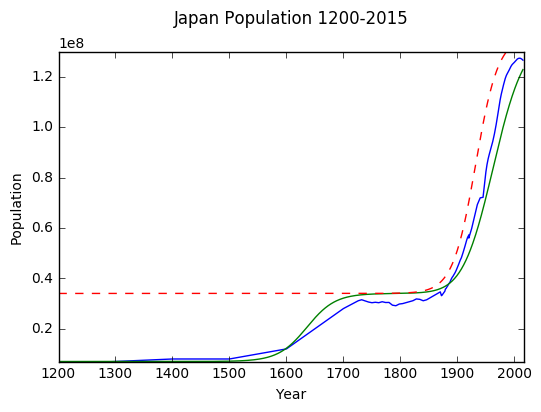

In [25]:
#Define our logistic model parameters for our population
r = .04 # growth rate / yr
t = 815 # number of years

#Define our parameters for the logisticlly modeled
#dynamic carrying capacity
rK = .05 #adoption/diffusion rate of the technology
k1 = 27000000 #the initial level of carrying capacity provided
kMax = 129300000-k1 #the max possible carrying capacity provided by new tech
tM = 1.115
kLog = KLogistic(rK,k1,kMax,t,tM)
plotDataK = logisticK(r,kLog,t)

#tempRange = np.arange(1200,2017,1)

#set axes correctly
axes = plt.gca()
axes.set_xlim([1200,2016])
axes.set_ylim([7000000,130000000])

#adjust our values for our offset axes
plotDataK = plotDataK+7000000
kLog = kLog+7000000

x_values = np.linspace(1200, 2015, 816)

plt.plot(jpRange,jpData, 'b')
plt.plot(x_values,plotDataK, 'g')
plt.plot(x_values,kLog, '--r')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Japan Population 1200-2015\n')
plt.show()


In [26]:
#Ok! So this looks pretty good as a starting point. Now let's run some Monte Carlo Simulation on it to see how 
#can be improved with some better parameters!

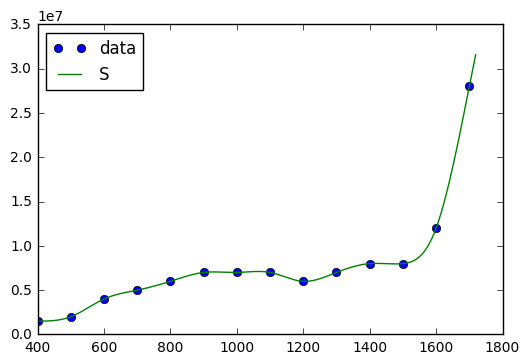

In [27]:
#So in order to do any least squares regression on our data and tune our parameters, we need to rectify some 
#gaps in our data. For instance, we only have population data every 100 years from 400-17000.
#Sounds like a pretty decent spot to use Cubic Splines for interpolation. In this case, we want natural 
#boundary conditions as well 


cubicRangeJpEarly = np.arange(400,1720,1)

cs = CubicSpline(earlyJpDate,earlyJpPop,bc_type='natural')
plt.plot(earlyJpDate, earlyJpPop, 'o', label='data')
plt.plot(cubicRangeJpEarly, cs(cubicRangeJpEarly), label="S")
plt.legend(loc='upper left')
plt.show()

cubicFitJpEarly = np.empty(cubicRangeJpEarly.size)
for i in range(cubicRangeJpEarly.size):
    cubicFitJpEarly[i] = cs(cubicRangeJpEarly[i])


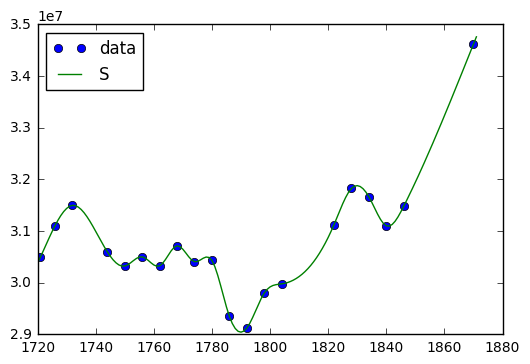

In [28]:
#ok, a little more work required here as we don't have a set interval in this period, but we can work with it


cubicRangeMej = np.arange(1720,1872,1)

csMej = CubicSpline(mejJpDate,mejJpPop,bc_type=('not-a-knot','natural'))
plt.plot(mejJpDate, mejJpPop, 'o', label='data')
plt.plot(cubicRangeMej, csMej(cubicRangeMej), label="S")
plt.legend(loc='upper left')
plt.show()

cubicFitJpMej = np.empty(cubicRangeMej.size)
for i in range(cubicFitJpMej.size):
    cubicFitJpMej[i] = csMej(cubicRangeMej[i])
    


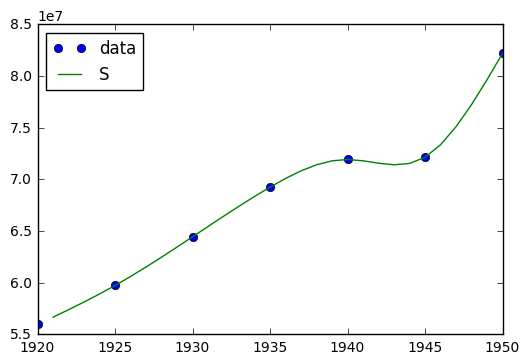

In [29]:
cubicRangeJpMid = np.arange(1921,1951,1)

csJpMid = CubicSpline(midJpDate,midJpPop,bc_type='natural')
plt.plot(midJpDate, midJpPop, 'o', label='data')
plt.plot(cubicRangeJpMid, csJpMid(cubicRangeJpMid), label="S")
plt.legend(loc='upper left')
plt.show()

cubicFitJpMid = np.empty(cubicRangeJpMid.size)
for i in range(cubicFitJpMid.size):
    cubicFitJpMid[i] = csJpMid(cubicRangeJpMid[i])
    

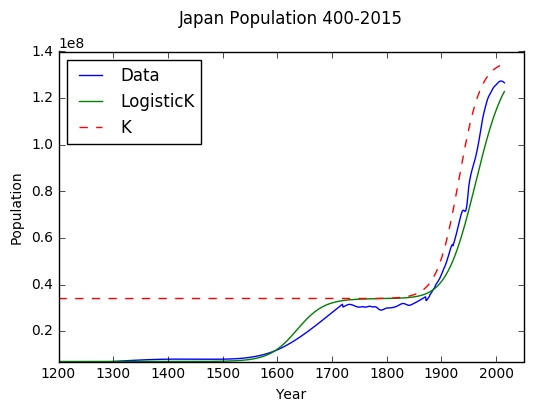

In [30]:

np.set_printoptions(threshold=np.inf)
jpData = np.concatenate((cubicFitJpEarly,cubicFitJpMej,impJpPop,cubicFitJpMid,modJPop))
jpRange = np.concatenate((cubicRangeJpEarly,cubicRangeMej,impJpDate,cubicRangeJpMid,modHistDates))


x_values = np.linspace(1200, 2015, 816)


plt.plot(jpRange,jpData, 'b', label='Data')
plt.plot(x_values,plotDataK, 'g', label='LogisticK')
plt.plot(x_values,kLog, '--r', label='K')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Japan Population 400-2015\n')
axes = plt.gca()
axes.set_xlim([1200,2050])
axes.set_ylim([7000000,140000000])
plt.show()

In [31]:
def r2(y_fit,y):
    res = np.sum((y-y_fit)**2)
    
    sumSq = np.sum((y-np.mean(y))**2)
    rSq = 1-(res/sumSq)
    return rSq

print(r2(plotDataK[0:816],jpData[800:1616]))


0.976682473758


In [32]:
#Well how about that! It looks like our function matches fairly well!
#Though we still have a fair bit of room for improvement, to Monte Carlo we go!

In [33]:
#In our monte carlo simulation, we want to tune the parameters r, rK, and tM
#and our fitness function will be r2

In [34]:
def cost(y_fit,y):
    res = np.sum((y-y_fit)**2)
    
    sumSq = np.sum((y-np.mean(y))**2)
    rSq = 1-(res/sumSq)
    return 1-rSq
#Define our starting parameters for our population
r = 37/1000 # growth rate / yr
rK = 5/100 #adoption/diffusion rate of the technology
tM = 1115/1000

#some neccesary constants
k1 = 26000000 #the initial level of carrying capacity provided
kMax = 129300000-k1 #the max possible carrying capacity provided by new tech
t = 815 # number of years
numSims = 1000 #number of simulations to test

#our baseline to compare against
baseline = jpData[800:1616]

#Monte Carlo/Simulated Annealing functions

def AcceptNeighbor(current, neighbor, curTemp):
        curFit = cost(current,baseline)
        nFit = cost(neighbor,baseline)
        if(nFit<curFit):
            return True
        else:
            #pAccept = math.exp((1-(r2(neighbor,baseline)))-(1-r2(current,baseline))/curTemp)
            pAccept = math.exp(-(nFit-curFit)/curTemp)
            if pAccept>1:
                pAccept = 1
            if random.uniform(0, 1) < pAccept:
                return True
        return False

def CalculateTemp(step,nSteps):
    initialTemp = 1
    gamma = 5.0
    return initialTemp*(1-gamma/nSteps)**step

def GenerateNeighbor(currentParms,modParm):
    #we will randomly adjust our tM 
    #up or down by a small amount
    neighbor = currentParms[:]
    plusMin = random.randint(0,1)
    scale = random.randint(1,100)
    if(plusMin == 1):
        neighbor[modParm] += 0.001*scale
    else:
        neighbor[modParm] -= 0.001*scale
    return neighbor

def generateFromParms(parms):
    r = parms[0]
    rK = parms[1]
    tM = parms[2]
    
    kLog = KLogistic(rK,k1,kMax,t,tM)
    return logisticK(r,kLog,t)


def simulatedAnnealling(currentParms,nSteps,mod):
    mvCount = 0
    bestParms = 0;
    bestR2 = 0;
    for i in range(1,nSteps):
        neighborParms = GenerateNeighbor(currentParms,mod)
        currentTemp = CalculateTemp(i,nSteps)
        current = generateFromParms(currentParms)
        neighbor = generateFromParms(neighborParms)
        if AcceptNeighbor(current,neighbor,currentTemp):
            mvCount +=1
            currentParms = neighborParms
    return currentParms



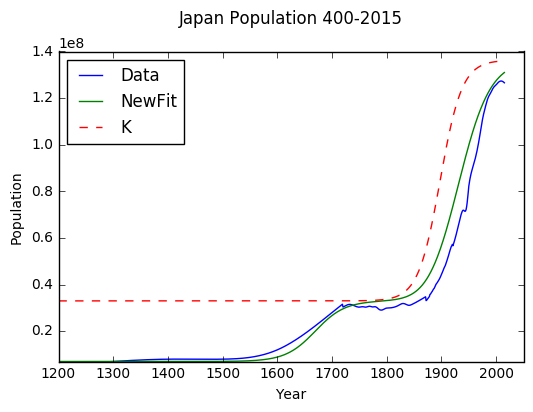

[0.037, 0.05, 1.1700000000000006]
0.964284414245


In [35]:
initParms = [r,rK,tM]
fitParms = simulatedAnnealling(initParms,numSims,2)

newR = fitParms[0]
newRK = fitParms[1]
newTM = fitParms[2]
kLog = KLogistic(newRK,k1,kMax,t,newTM)
newFit = logisticK(newR,kLog,t)    

x_values = np.linspace(1200, 2015, 816)
#adjust our values for our offset axes
newFit = newFit+7000000
kLog = kLog+7000000

plt.plot(jpRange,jpData, 'b', label='Data')
plt.plot(x_values,newFit, 'g', label='NewFit')
plt.plot(x_values,kLog, '--r', label='K')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Japan Population 400-2015\n')
axes = plt.gca()
axes.set_xlim([1200,2050])
axes.set_ylim([7000000,140000000])
plt.show()
print(fitParms)
print(r2(newFit[0:816],jpData[800:1616]))

In [36]:
#Well, It looks like this is about as good of a function as we can get.
#Now that we have an understanding of what the growth of a confined, technology
#dependent population would be, we can take this and extrapolate to a Martian
#colony

#Let's take 1000 years of growth

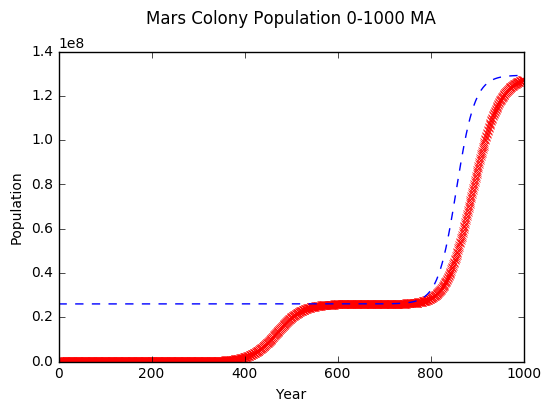

In [37]:
marsT = 1000
kMax = 
kLog = KLogistic(newRK,k1,kMax,marsT,newTM)
newFit = logisticK(newR,kLog,marsT)    

#adjust our values for our offset axes

plt.plot(range(marsT+1),newFit, 'rx')
plt.plot(range(marsT+1),kLog, '--b', label='K')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Mars Colony Population 0-1000 MA\n')

plt.show()

In [38]:
#So what could this possible be taken to represent?
#Let's focus on the two pulses in the logistic curve that we see.
#The first pulse can be understood as the intial population boom on Mars
#once the early pioneers have established a self sustaining colony

#Then, what of the second pulse? Well, clearly it should be taken as a huge technology leap
#The obvious technology here - terraforming

#But terraforming would probably take much longer to shape up.
#Let's adjust our parameters and time scale a bit

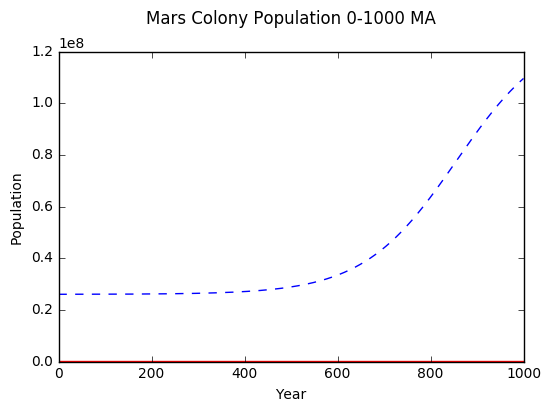

In [39]:
marsT = 1000
kLog = KLogistic(newRK*.2,k1,kMax,marsT,newTM)
newFit = logisticK(newR*.2,kLog,marsT)    

#adjust our values for our offset axes

plt.plot(range(marsT+1),newFit, 'r')
plt.plot(range(marsT+1),kLog, '--b', label='K')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Mars Colony Population 0-1000 MA\n')

plt.show()

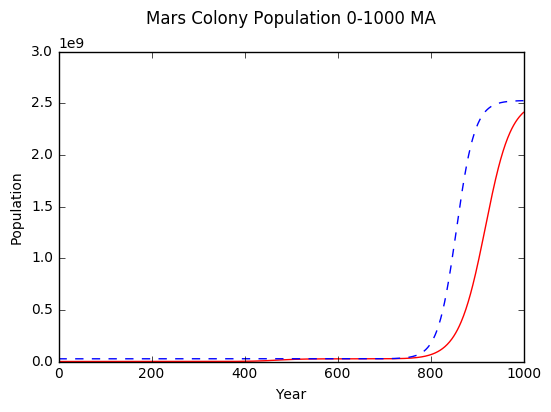

In [43]:
#Ok, that seems a bit more like it!
#We don't have any real idea of how long terraforming mars will take, but as you can see,
#once we have a better idea of that timeframe, we can adjust some of our parameters and
#then we can get a picture of the population growth

#But what of the carrying capacity post terraform?
#Well, Mars has roughly the surface area of earth. But we should also consider the emergence of oceans
#once  terraformed.
#Rough estimates, place the ancient Martian Ocean at about a third of the planet's surface.
#Let's combine that, with the thought that Mars will be less densely populated that Earth, at least after
#the terraforming boom, and mark the carrying capacity at one third of Earth's

marsT = 1000
marsKMax = 7500000000*(1/3)
kLog = KLogistic(newRK,k1,marsKMax,marsT,newTM)
newFit = logisticK(newR,kLog,marsT)    

#adjust our values for our offset axes

plt.plot(range(marsT+1),newFit, 'r')
plt.plot(range(marsT+1),kLog, '--b', label='K')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Mars Colony Population 0-1000 MA\n')

plt.show()